In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import seaborn as sns

import time

import MySQLdb
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
path = "/home/jingfei/data/MAG/"

# Load data

In [2]:
df_conference = pd.read_csv(path+"df_conference.csv")
df_paper = pd.read_csv(path+"df_paper.csv")
df_a2p = pd.read_csv(path+"df_a2p.csv", low_memory=False)
df_aff = pd.read_csv(path+"df_aff.csv")
df_author = pd.read_csv(path+"df_author.csv")

df_relationship = pd.read_csv(path+"df_relationship.csv")

df_paper2 = pd.read_csv(path+"df_paper_withcountry.csv")

In [116]:
print "----------------------------df_conference-----------------------------------"
print df_conference.info()
print "----------------------------df_paper----------------------------------"
print df_paper.info()
print "-----------------------------df_a2p----------------------------------"
print df_a2p.info()
print "-----------------------------df_aff----------------------------------"
print df_aff.info()
print "-----------------------------df_author----------------------------------"
print df_author.info()
print "-----------------------------df_relationship----------------------------------"
print df_relationship.info()
print "-----------------------------df_paper2----------------------------------"
print df_paper2.info()


----------------------------df_conference-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 6 columns):
con_id                 665 non-null object
con_abbr               665 non-null object
con_name               665 non-null object
CCF_classification     665 non-null object
CCF_category           665 non-null object
CORE_classification    665 non-null object
dtypes: object(6)
memory usage: 31.2+ KB
None
----------------------------df_paper----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1283271 entries, 0 to 1283270
Data columns (total 5 columns):
id               1283271 non-null object
title            1283271 non-null object
publish_year     1283271 non-null int64
publish_date     1213856 non-null object
conference_id    1283271 non-null object
dtypes: int64(1), object(4)
memory usage: 49.0+ MB
None
-----------------------------df_a2p----------------------------------
<c

# Trend analysis for papers published every year

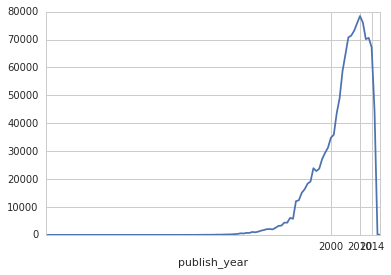

In [184]:
df_paper.groupby(['publish_year']).size().plot(xticks=[2000, 2010, 2014])

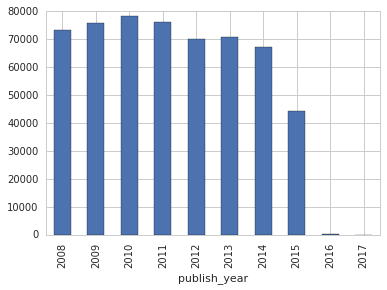

In [183]:
df_paper.groupby(['publish_year']).size().ix[2008:2017].plot(kind='bar')

Hence, we find 2015, 2016 data is abnormal, especially 2016.

# Trend analysis for particluar conferences

In [40]:
res = df_paper2[df_paper2['con_abbr'] == 'KDD'].groupby(['publish_year']).size()
res[res > 10]

Series([], dtype: int64)

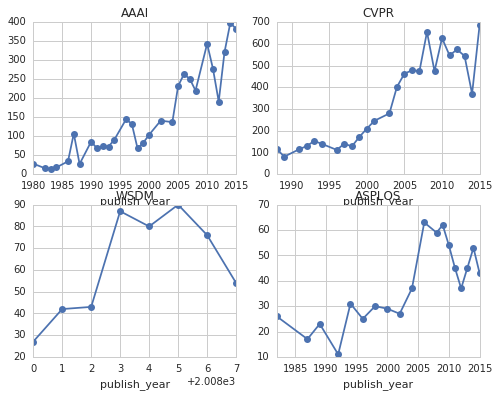

In [84]:
fig, axes = plt.subplots(2,2)
fig.set_size_inches(8,6)
aaai = df_paper2[df_paper2['con_abbr'] == 'AAAI'].groupby(['publish_year']).size()
aaai[aaai>10].plot(style='o-', ax=axes[0,0], title='AAAI')

cvpr = df_paper2[df_paper2['con_abbr'] == 'CVPR'].groupby(['publish_year']).size()
cvpr[cvpr>10].plot(style='o-', ax=axes[0,1], title='CVPR')

wsdm = df_paper2[df_paper2['con_abbr'] == 'WSDM'].groupby(['publish_year']).size()
wsdm[wsdm>10].plot(style='o-', ax=axes[1,0], title='WSDM')

asplos = df_paper2[df_paper2['con_abbr'] == 'ASPLOS'].groupby(['publish_year']).size()
asplos[asplos>10].plot(style='o-', ax=axes[1,1], title='ASPLOS')

In [65]:
aaai = df_paper2[df_paper2['con_abbr'] == 'AAAI'].groupby(['publish_year']).size()
cvpr = df_paper2[df_paper2['con_abbr'] == 'CVPR'].groupby(['publish_year']).size()
wsdm = df_paper2[df_paper2['con_abbr'] == 'WSDM'].groupby(['publish_year']).size()
asplos = df_paper2[df_paper2['con_abbr'] == 'ASPLOS'].groupby(['publish_year']).size()

In [79]:
venues = DataFrame([aaai, cvpr, wsdm, asplos]).T
venues.columns=['AAAI', 'CVPR', 'WSDM', 'ASPLOS']

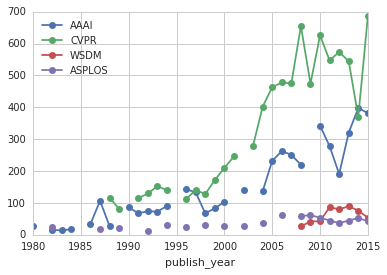

In [83]:
venues[venues>10].plot(kind='line', style='-o')

We find:
+ some venues have few papers but some have a lot of venues. 
+ SIGKDD is not in df_aff, because its abbreviation is KDD in Affiliations.txt
+ if the number of paper is less than or equal 10 in some years, we think the venue don't be held in the years.

# Trend analysis for countries

In [92]:
df_tmp = df_paper2.groupby(['publish_year', 'country']).size().unstack().fillna(0)

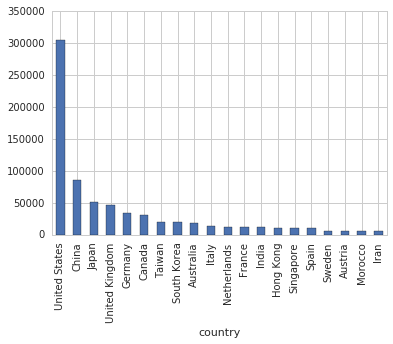

In [99]:
df_tmp.sum().sort_values(ascending = False)[:20].plot(kind='bar')

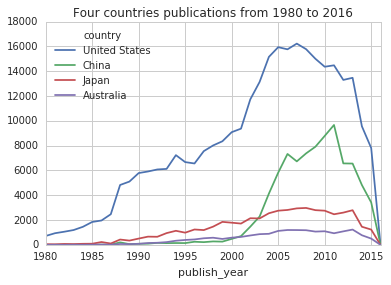

In [111]:
df_tmp[['United States', 'China', 'Japan', 'Australia']].ix[1980:2017]\
.plot(style='-', title='Four countries publications from 1980 to 2016')

# Statistics for df_conference

In [201]:
print df_conference.groupby(['CCF_classification']).size()
print "---------------------------------------"
print df_conference.groupby(['CORE_classification']).size()

CCF_classification
A     33
B    104
C    117
X    411
dtype: int64
---------------------------------------
CORE_classification
A               139
A*               52
Australasian     11
B               209
C               204
L                 1
Unranked          5
X                44
dtype: int64


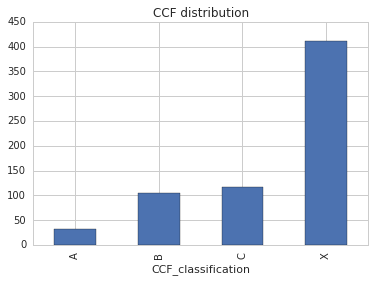

In [202]:
df_conference.groupby(['CCF_classification']).size().plot(kind='bar', title='CCF distribution')

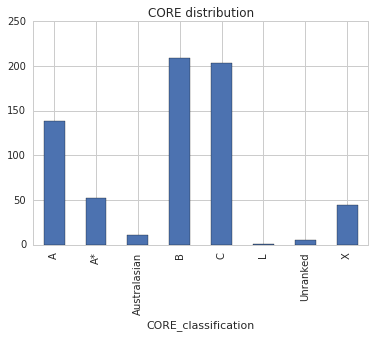

In [208]:
df_conference.groupby(['CORE_classification']).size().plot(kind='bar', title='CORE distribution')

In [221]:
df_conference.pivot_table('con_id', index=['CCF_classification'], \
                          columns=['CORE_classification'], aggfunc=len, margins=True)\
[['A*','A','B','C','L','Australasian','Unranked','X', 'All']].fillna(0)

CORE_classification,A*,A,B,C,L,Australasian,Unranked,X,All
CCF_classification,,,,,,,,,
A,29.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,33.0
B,17.0,54.0,13.0,3.0,0.0,0.0,0.0,17.0,104.0
C,2.0,32.0,44.0,13.0,0.0,1.0,0.0,25.0,117.0
X,4.0,51.0,152.0,188.0,1.0,10.0,5.0,0.0,411.0
All,52.0,139.0,209.0,204.0,1.0,11.0,5.0,44.0,665.0


In [124]:
df_paper3 = pd.merge(df_paper2, df_conference\
                     , left_on=['con_id', 'con_abbr'], right_on=['con_id', 'con_abbr'])

In [222]:
df_paper3.pivot_table('con_id', index=['CCF_classification'], \
                          columns=['CORE_classification'], aggfunc=len, margins=True)\
[['A*','A','B','C','L','Australasian','Unranked','X', 'All']].fillna(0)

CORE_classification,A*,A,B,C,L,Australasian,Unranked,X,All
CCF_classification,,,,,,,,,
A,79250.0,10464.0,0.0,0.0,0.0,0.0,0.0,7718.0,97432.0
B,26852.0,69008.0,30885.0,1529.0,0.0,0.0,0.0,18123.0,146397.0
C,1228.0,40399.0,116996.0,7750.0,0.0,596.0,0.0,44333.0,211302.0
X,2956.0,91161.0,141855.0,181364.0,541.0,3042.0,898.0,0.0,421817.0
All,110286.0,211032.0,289736.0,190643.0,541.0,3638.0,898.0,70174.0,876948.0


In [227]:
df_conference.pivot_table('con_id', index=['CCF_classification', 'CCF_category'], \
                          columns=['CORE_classification'], aggfunc=len, margins=True)\
[['A*','A','B','C','L','Australasian','Unranked','X', 'All']].fillna(0)

CORE_classification                A*      A      B      C    L  Australasian  \
CCF_classification CCF_category                                                 
A                  1.0            3.0    1.0    0.0    0.0  0.0           0.0   
                   10.0           1.0    0.0    0.0    0.0  0.0           0.0   
                   2.0            2.0    0.0    0.0    0.0  0.0           0.0   
                   3.0            3.0    0.0    0.0    0.0  0.0           0.0   
                   4.0            6.0    0.0    0.0    0.0  0.0           0.0   
                   5.0            4.0    0.0    0.0    0.0  0.0           0.0   
                   6.0            3.0    0.0    0.0    0.0  0.0           0.0   
                   7.0            1.0    0.0    0.0    0.0  0.0           0.0   
                   8.0            4.0    1.0    0.0    0.0  0.0           0.0   
                   9.0            2.0    0.0    0.0    0.0  0.0           0.0   
B                  1.0            2.0   14.0    1.0    0.0  0.0           0.0   
                   10.0           0.0    2.0    1.0    0.0  0.0           0.0   
                   2.0            1.0    4.0    3.0    0.0  0.0           0.0   
                   3.0            0.0    6.0    1.0    1.0  0.0           0.0   
                   4.0            1.0    9.0    2.0    1.0  0.0           0.0   
                   5.0            3.0    7.0    0.0    0.0  0.0           0.0   
                   6.0            2.0    4.0    0.0    0.0  0.0           0.0   
                   7.0            1.0    1.0    3.0    0.0  0.0           0.0   
                   8.0            7.0    4.0    1.0    1.0  0.0           0.0   
                   9.0            0.0    3.0    1.0    0.0  0.0           0.0   
C                  1.0            0.0    8.0    4.0    1.0  0.0           0.0   
                   10.0           0.0    0.0    1.0    0.0  0.0           0.0   
                   2.0            0.0    4.0    6.0    1.0  0.0           0.0   
                   3.0            0.0    0.0    4.0    2.0  0.0           1.0   
                   4.0            0.0    3.0    9.0    4.0  0.0           0.0   
                   5.0            1.0    5.0    2.0    3.0  0.0           0.0   
                   6.0            0.0    6.0    2.0    0.0  0.0           0.0   
                   7.0            1.0    0.0    4.0    2.0  0.0           0.0   
                   8.0            0.0    5.0    8.0    0.0  0.0           0.0   
                   9.0            0.0    1.0    4.0    0.0  0.0           0.0   
X                  X              4.0   51.0  152.0  188.0  1.0          10.0   
All                              52.0  139.0  209.0  204.0  1.0          11.0   

CORE_classification              Unranked     X    All  
CCF_classification CCF_category                         
A                  1.0                0.0   0.0    4.0  
                   10.0               0.0   0.0    1.0  
                   2.0                0.0   1.0    3.0  
                   3.0                0.0   1.0    4.0  
                   4.0                0.0   0.0    6.0  
                   5.0                0.0   0.0    4.0  
                   6.0                0.0   0.0    3.0  
                   7.0                0.0   0.0    1.0  
                   8.0                0.0   0.0    5.0  
                   9.0                0.0   0.0    2.0  
B                  1.0                0.0   5.0   22.0  
                   10.0               0.0   1.0    4.0  
                   2.0                0.0   3.0   11.0  
                   3.0                0.0   1.0    9.0  
                   4.0                0.0   4.0   17.0  
                   5.0                0.0   0.0   10.0  
                   6.0                0.0   1.0    7.0  
                   7.0                0.0   2.0    7.0  
                   8.0                0.0   0.0   13.0  
                   9.0                0.0   0.0 

In [226]:
df_paper3.pivot_table('con_id', index=['CCF_classification', 'CCF_category'], \
                          columns=['CORE_classification'], aggfunc=len, margins=True)\
[['A*','A','B','C','L','Australasian','Unranked','X', 'All']].fillna(0)

CORE_classification                    A*         A         B         C  \
CCF_classification CCF_category                                           
A                  1.0             3086.0    2138.0       0.0       0.0   
                   10.0             727.0       0.0       0.0       0.0   
                   2.0             3186.0       0.0       0.0       0.0   
                   3.0             4787.0       0.0       0.0       0.0   
                   4.0            11959.0       0.0       0.0       0.0   
                   5.0            13007.0       0.0       0.0       0.0   
                   6.0             5497.0       0.0       0.0       0.0   
                   7.0             8629.0       0.0       0.0       0.0   
                   8.0            15157.0    8326.0       0.0       0.0   
                   9.0            13215.0       0.0       0.0       0.0   
B                  1.0             3535.0   23478.0    4158.0       0.0   
                   10.0               0.0     822.0     944.0       0.0   
                   2.0              827.0    2235.0    1910.0       0.0   
                   3.0                0.0    3009.0    1027.0     452.0   
                   4.0              948.0    8258.0     795.0     601.0   
                   5.0             6577.0    8493.0       0.0       0.0   
                   6.0             3583.0   10796.0       0.0       0.0   
                   7.0             1637.0     353.0    5944.0       0.0   
                   8.0             9745.0    7273.0   15927.0     476.0   
                   9.0                0.0    4291.0     180.0       0.0   
C                  1.0                0.0   11935.0    5786.0     713.0   
                   10.0               0.0       0.0     133.0       0.0   
                   2.0                0.0    4776.0   35578.0     399.0   
                   3.0                0.0       0.0     962.0     614.0   
                   4.0                0.0    1276.0    6705.0    1624.0   
                   5.0              499.0    4521.0    3876.0    2081.0   
                   6.0                0.0    5990.0    1691.0       0.0   
                   7.0              729.0       0.0   44446.0    2319.0   
                   8.0                0.0   11470.0   15045.0       0.0   
                   9.0                0.0     431.0    2774.0       0.0   
X                  X               2956.0   91161.0  141855.0  181364.0   
All                              110286.0  211032.0  289736.0  190643.0   

CORE_classification                  L  Australasian  Unranked        X  \
CCF_classification CCF_category                                           
A                  1.0             0.0           0.0       0.0      0.0   
                   10.0            0.0           0.0       0.0      0.0   
                   2.0             0.0           0.0       0.0   6865.0   
                   3.0             0.0           0.0       0.0    853.0   
                   4.0             0.0           0.0       0.0      0.0   
                   5.0             0.0           0.0       0.0      0.0   
                   6.0             0.0           0.0       0.0      0.0   
                   7.0             0.0           0.0       0.0      0.0   
                   8.0             0.0           0.0       0.0      0.0   
                   9.0             0.0           0.0       0.0      0.0   
B                  1.0             0.0           0.0       0.0   4436.0   
                   10.0            0.0           0.0       0.0   1767.0   
                   2.0             0.0           0.0       0.0   2029.0   
                   3.0             0.0           0.0       0.0   1038.0   
                   4.0             0.0           0.0       0.0   6666.0   
                   5.0             0.0           0.0       0.0      0.0   
                   6.0             0.0           0.0       0.0   1368.0   
                   7.0  

**[STATISTICS]:**
+ In CCF, but not in CORE: 44. (A:2, B:17, C:25)
+ In CORE, but not in CCF: 411. We don't know these venues's computer category.

# Trend analysis for whether in CCF

In [270]:
df_tmp2 = df_paper3.groupby(['publish_year', 'CCF_classification', 'country'])\
.size().unstack().fillna(0)

In [271]:
df_tmp2.head()

,country,Afghanistan,Albania,Algeria,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
publish_year,CCF_classification,,,,,,,,,,,,,,,,,,,,,
1902,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1928,X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1946,B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1951,B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1952,B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [272]:
df_tmp3 = df_tmp2[['China', 'Japan', 'Australia']].unstack().ix[2000:2015].stack()

In [273]:
tot_paper = df_paper3.groupby(['publish_year']).size().ix[2000:2015]

In [274]:
#tot_paper
df_tmp3.unstack(0).ix['X'].unstack(0)
#tot_paper

country,China,Japan,Australia
publish_year,,,
2000,207.0,863.0,304.0
2001,458.0,923.0,385.0
2002,938.0,1119.0,431.0
2003,1821.0,1181.0,473.0
2004,3149.0,1417.0,460.0
2005,4627.0,1514.0,662.0
2006,4427.0,1437.0,704.0
2007,4393.0,1681.0,711.0
2008,4242.0,1704.0,754.0


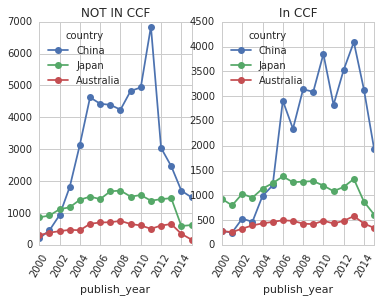

In [278]:
fig, axes = plt.subplots(1,2)
df_tmp3.unstack(0).ix['X'].unstack(0).plot(style='o-', title='NOT IN CCF', ax=axes[0], rot=60)

df_tmp3.unstack(0).ix[['A','B','C']].sum().unstack(0).plot(style='o-',title='In CCF', ax=axes[1],rot=60)

# Trend analysis for whether in CORE

In [275]:
df_tmp5 = df_paper3.groupby(['publish_year', 'CORE_classification', 'country'])\
.size().unstack().fillna(0)
df_tmp4 = df_tmp5[['China', 'Japan', 'Australia']].unstack().ix[2000:2015].stack()

In [276]:
df_tmp4.unstack(0).ix['X'].unstack(0)

country,China,Japan,Australia
publish_year,,,
2000,30.0,151.0,26.0
2001,36.0,145.0,49.0
2002,61.0,151.0,44.0
2003,61.0,161.0,66.0
2004,113.0,151.0,54.0
2005,211.0,256.0,64.0
2006,300.0,192.0,60.0
2007,257.0,223.0,60.0
2008,156.0,158.0,34.0


In [277]:
df_tmp3.unstack(0).ix['X'].unstack(0)

country,China,Japan,Australia
publish_year,,,
2000,207.0,863.0,304.0
2001,458.0,923.0,385.0
2002,938.0,1119.0,431.0
2003,1821.0,1181.0,473.0
2004,3149.0,1417.0,460.0
2005,4627.0,1514.0,662.0
2006,4427.0,1437.0,704.0
2007,4393.0,1681.0,711.0
2008,4242.0,1704.0,754.0


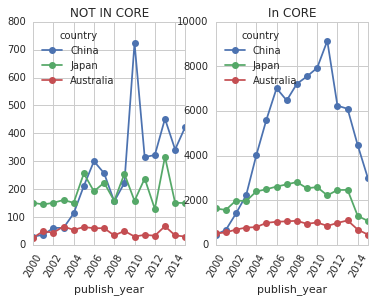

In [279]:
fig, axes = plt.subplots(1,2)
df_tmp4.unstack(0).ix['X'].unstack(0).plot(style='o-', title='NOT IN CORE', ax=axes[0], rot=60)

df_tmp4.unstack(0).ix[['A*', 'A','B','C']].sum().unstack(0).plot(style='o-',title='In CORE', ax=axes[1],rot=60)

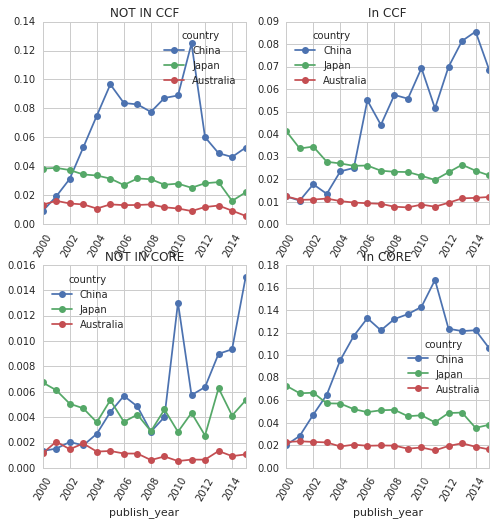

In [280]:
# Probability
fig, axes = plt.subplots(2,2)
fig.set_size_inches(8,8)
df_tmp3.unstack(0).ix['X'].unstack(0).div(tot_paper, axis=0).plot(style='o-', title='NOT IN CCF', ax=axes[0, 0], rot=60)

df_tmp3.unstack(0).ix[['A','B','C']].sum().unstack(0).div(tot_paper, axis=0).plot(style='o-',title='In CCF', ax=axes[0, 1],rot=60)

df_tmp4.unstack(0).ix['X'].unstack(0).div(tot_paper, axis=0).plot(style='o-', title='NOT IN CORE', ax=axes[1,0], rot=60)

df_tmp4.unstack(0).ix[['A*','A','B','C']].sum().unstack(0).div(tot_paper, axis=0).plot(style='o-',title='In CORE', ax=axes[1,1],rot=60)

Firstly, we need interpret the plot:
+ Y-axis: the probability of the number of papers by each country of total paper
+ "NOT IN CCF" refers to [X,A\*; X,A; X,B; X,C; X,...]
+ "IN CCF" refers to [A,\_; B,\_; C,\_]
+ "NOT IN CORE" refers to [A,X; B,X; C,X]
+ "IN CORE" refers to [\_,A\*; \_,A; \_,B; \_,C; \_;L; \_,Australisian; \_,Not ranked; \_,Unranked; \_,National]

From the picture above, we can find:
+ For "NOT IN CCF": From 2011 to 2014, the number of papers published by China was decreasing.
+ For "IN CCF": From 2011 to 2014, the number of papers published by China was increasing.
+ For "NOT IN CORE": From 2006 to 2012, the number of papers published by Australia was decreasing but increasing from 2012. **[Stable]**
+ For "IN CORE": Stable

# Trend analysis for particular conferences [A,X; B,X; C,X]

In [314]:
tot_paper_China = df_paper3[df_paper3['country']=='China'].groupby(['publish_year']).size().ix[2000:2015]
tot_paper_Australia = df_paper3[df_paper3['country']=='Australia'].groupby(['publish_year']).size().ix[2000:2015]

In [315]:
tot_paper_China

publish_year
2000     485
2001     708
2002    1469
2003    2286
2004    4136
2005    5827
2006    7334
2007    6735
2008    7380
2009    7916
2010    8788
2011    9671
2012    6572
2013    6559
2014    4828
2015    3425
dtype: int64

In [281]:
df_conference[(df_conference['CCF_classification']=='A') & (df_conference['CORE_classification']=='X')]

,con_id,con_abbr,con_name,CCF_classification,CCF_category,CORE_classification
630,43F6459B,EUROCRYPT,Theory and Application of Cryptographic Techni...,A,3.0,X
641,442BD7CD,INFOCOM,International Conference on Computer Communica...,A,2.0,X


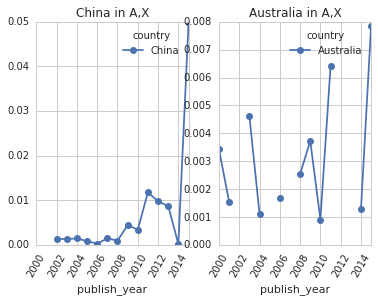

In [316]:
df_AX = df_paper3[(df_paper3['CCF_classification']=='A') & (df_paper3['CORE_classification']=='X')]
fig, axes = plt.subplots(1,2)
df_AX.groupby(['publish_year', 'country']).size().unstack()[['China']].ix[2000:2015].div(tot_paper_China, axis=0).plot(style='-o', ax=axes[0], title='China in A,X', rot=60)
df_AX.groupby(['publish_year', 'country']).size().unstack()[['Australia']].ix[2000:2015].div(tot_paper_Australia, axis=0).plot(style='-o', ax=axes[1], title='Australia in A,X', rot=60)

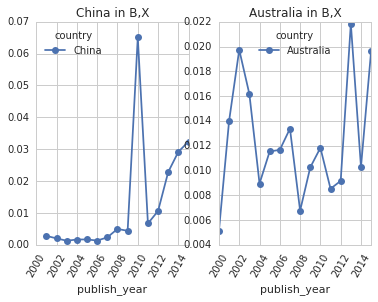

In [317]:
df_BX = df_paper3[(df_paper3['CCF_classification']=='B') & (df_paper3['CORE_classification']=='X')]
fig, axes = plt.subplots(1,2)
df_BX.groupby(['publish_year', 'country']).size().unstack()[['China']].ix[2000:2015].div(tot_paper_China, axis=0).plot(style='-o', ax=axes[0], title='China in B,X', rot=60)
df_BX.groupby(['publish_year', 'country']).size().unstack()[['Australia']].ix[2000:2015].div(tot_paper_Australia, axis=0).plot(style='-o', ax=axes[1], title='Australia in B,X', rot=60)

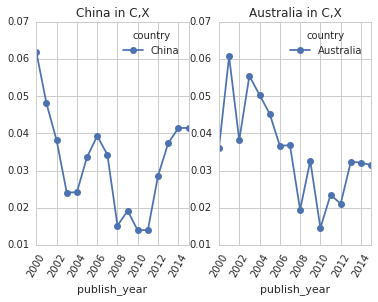

In [318]:
df_CX = df_paper3[(df_paper3['CCF_classification']=='C') & (df_paper3['CORE_classification']=='X')]
fig, axes = plt.subplots(1,2)
df_CX.groupby(['publish_year', 'country']).size().unstack()[['China']].ix[2000:2015].div(tot_paper_China, axis=0).plot(style='-o', ax=axes[0], title='China in C,X', rot=60)
df_CX.groupby(['publish_year', 'country']).size().unstack()[['Australia']].ix[2000:2015].div(tot_paper_Australia, axis=0).plot(style='-o', ax=axes[1], title='Australia in C,X', rot=60)

# Trend analysis for particular conferences [X,A\*; X,A; X,B; X,C]


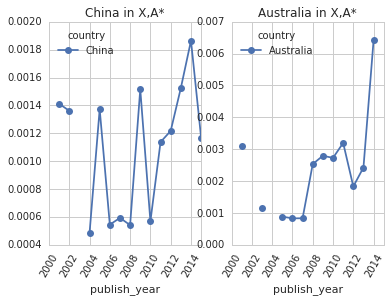

In [320]:
df_XAstar = df_paper3[(df_paper3['CCF_classification']=='X') & (df_paper3['CORE_classification']=='A*')]
fig, axes = plt.subplots(1,2)
df_XAstar.groupby(['publish_year', 'country']).size().unstack()[['China']].ix[2000:2015].div(tot_paper_China, axis=0).plot(style='-o', ax=axes[0], title='China in X,A*', rot=60)
df_XAstar.groupby(['publish_year', 'country']).size().unstack()[['Australia']].ix[2000:2015].div(tot_paper_Australia, axis=0).plot(style='-o', ax=axes[1], title='Australia in X,A*', rot=60)

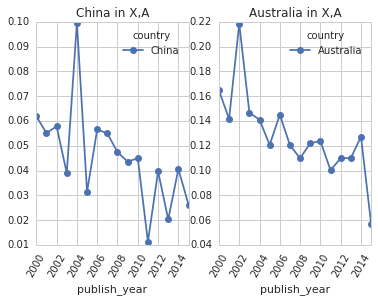

In [321]:
df_XA = df_paper3[(df_paper3['CCF_classification']=='X') & (df_paper3['CORE_classification']=='A')]
fig, axes = plt.subplots(1,2)
df_XA.groupby(['publish_year', 'country']).size().unstack()[['China']].ix[2000:2015].div(tot_paper_China, axis=0).plot(style='-o', ax=axes[0], title='China in X,A', rot=60)
df_XA.groupby(['publish_year', 'country']).size().unstack()[['Australia']].ix[2000:2015].div(tot_paper_Australia, axis=0).plot(style='-o', ax=axes[1], title='Australia in X,A', rot=60)

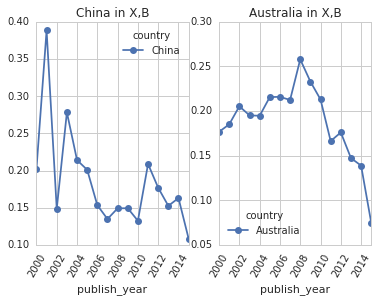

In [322]:
df_XB = df_paper3[(df_paper3['CCF_classification']=='X') & (df_paper3['CORE_classification']=='B')]
fig, axes = plt.subplots(1,2)
df_XB.groupby(['publish_year', 'country']).size().unstack()[['China']].ix[2000:2015].div(tot_paper_China, axis=0).plot(style='-o', ax=axes[0], title='China in X,B', rot=60)
df_XB.groupby(['publish_year', 'country']).size().unstack()[['Australia']].ix[2000:2015].div(tot_paper_Australia, axis=0).plot(style='-o', ax=axes[1], title='Australia in X,B', rot=60)

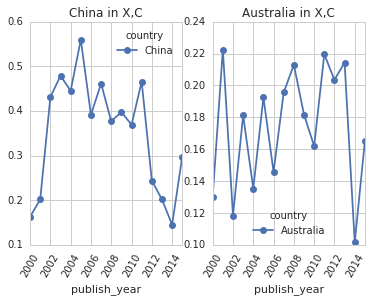

In [323]:
df_XC = df_paper3[(df_paper3['CCF_classification']=='X') & (df_paper3['CORE_classification']=='C')]
fig, axes = plt.subplots(1,2)
df_XC.groupby(['publish_year', 'country']).size().unstack()[['China']].ix[2000:2015].div(tot_paper_China, axis=0).plot(style='-o', ax=axes[0], title='China in X,C', rot=60)
df_XC.groupby(['publish_year', 'country']).size().unstack()[['Australia']].ix[2000:2015].div(tot_paper_Australia, axis=0).plot(style='-o', ax=axes[1], title='Australia in X,C', rot=60)

# Compute conference's H index

In [343]:
citation = DataFrame(df_relationship['src_id'].value_counts())
citation['tmp'] = citation.index
citation.columns = ['citation', 'paper_id']

In [346]:
df_paper4 = pd.merge(df_paper3, citation, left_on='paper_id', right_on='paper_id', how='left')

In [348]:
df_paper4['citation'] = df_paper4['citation'].fillna(0)

In [388]:
df_paper4.head()

,paper_id,title,publish_year,aff_name,country,con_id,con_abbr,con_name,CCF_classification,CCF_category,CORE_classification,citation
0,77BDE3C7,Consistent nonlinear dynamics: identifying mod...,2004,mathematical institute university of oxford,United Kingdom,456CDDD6,ISPD,International Symposium on Physical Design,C,1.0,X,7.0
1,7F9822E0,"Parameter space analysis, pattern sensitivity ...",2001,mathematical institute university of oxford,United Kingdom,456CDDD6,ISPD,International Symposium on Physical Design,C,1.0,X,23.0
2,78B15C87,Highly nonlinear solitary waves in heterogeneo...,2009,mathematical institute university of oxford,United Kingdom,456CDDD6,ISPD,International Symposium on Physical Design,C,1.0,X,29.0
3,7B3FF2C2,Active propagation and cut-off for low TM mode...,2000,national autonomous university of mexico,Mexico,456CDDD6,ISPD,International Symposium on Physical Design,C,1.0,X,1.0
4,79D26C2D,Evolution of two-dimensional standing and trav...,2004,national autonomous university of mexico,Mexico,456CDDD6,ISPD,International Symposium on Physical Design,C,1.0,X,2.0


In [381]:
df_conference['con_id'].count()

665

In [399]:
length = df_conference['con_id'].count()
hindices = []
cnt = 0
for one_item in range(length):
    cur_id = df_conference.ix[one_item]['con_id']
    tmp = df_paper4[df_paper4['con_id']==cur_id].sort_values(by='citation', ascending=False)['citation']
    tmp.index = range(1, tmp.size+1)
    hindex = tmp[tmp.index <= tmp].size
    hindices.append(hindex)
    if cnt % 1000 == 0:
        print cnt, " finished."
    cnt += 1
print hindices

0  finished.
[12, 46, 4, 9, 28, 69, 20, 11, 29, 56, 48, 16, 34, 35, 13, 30, 11, 73, 8, 20, 23, 8, 48, 42, 12, 43, 29, 7, 37, 8, 30, 77, 14, 22, 39, 98, 22, 21, 35, 20, 23, 39, 21, 15, 7, 20, 13, 64, 5, 10, 19, 43, 38, 4, 37, 11, 39, 13, 42, 100, 14, 20, 4, 9, 16, 16, 20, 14, 20, 65, 9, 6, 12, 44, 9, 26, 26, 13, 32, 75, 158, 32, 2, 21, 11, 11, 14, 23, 86, 59, 11, 37, 7, 21, 15, 107, 18, 23, 10, 72, 10, 80, 0, 15, 83, 14, 13, 55, 24, 45, 62, 4, 45, 20, 33, 59, 95, 13, 14, 25, 15, 25, 8, 11, 106, 17, 10, 130, 5, 28, 19, 25, 82, 19, 65, 15, 13, 17, 34, 32, 6, 33, 21, 14, 5, 10, 14, 14, 11, 12, 10, 14, 32, 25, 8, 72, 20, 16, 1, 8, 9, 17, 161, 17, 49, 127, 37, 18, 43, 37, 25, 28, 2, 32, 46, 5, 5, 16, 22, 17, 16, 65, 27, 15, 32, 24, 6, 23, 0, 64, 18, 29, 47, 15, 13, 25, 12, 16, 72, 25, 15, 24, 63, 40, 14, 86, 8, 103, 29, 28, 24, 16, 34, 21, 64, 18, 48, 9, 19, 12, 29, 39, 19, 20, 6, 29, 28, 62, 1, 44, 36, 22, 19, 74, 25, 27, 36, 79, 19, 12, 12, 40, 6, 19, 29, 6, 34, 15, 23, 25, 13, 31, 31, 28,

In [400]:
df_conference['hindex'] = hindices

In [402]:
df_conference['label'] = df_conference['CCF_classification'] +"," + df_conference['CORE_classification']

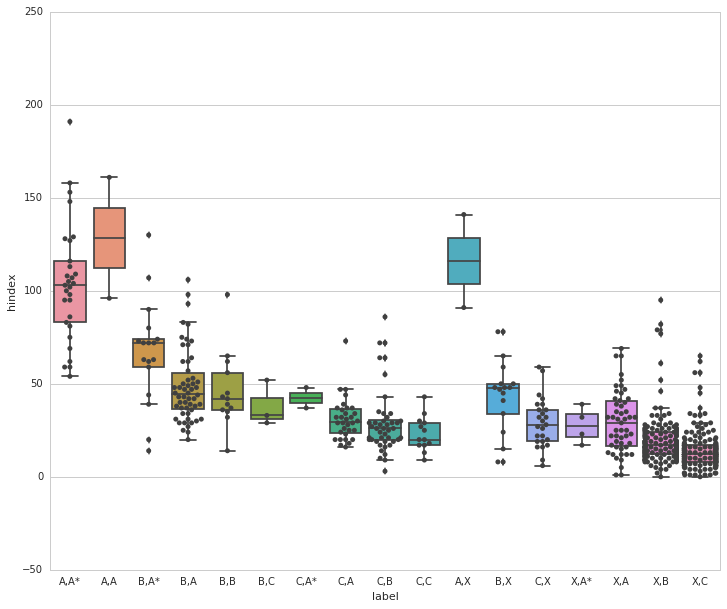

In [438]:
fig = plt.figure()
fig.set_size_inches(12, 10)
sns.boxplot(x="label", y="hindex", \
                 data=df_conference, order=['A,A*','A,A', 'B,A*', 'B,A', 'B,B', 'B,C', 'C,A*', 'C,A','C,B','C,C',\
                                         'A,X','B,X','C,X', 'X,A*','X,A','X,B','X,C'])
sns.swarmplot(x="label", y="hindex", data=df_conference, order=['A,A*','A,A', 'B,A*', 'B,A', 'B,B', 'B,C', 'C,A*', 'C,A','C,B','C,C',\
                                         'A,X','B,X','C,X', 'X,A*','X,A','X,B','X,C'], color=".25")

# Trends analysis for different category

In [575]:
grouped = df_paper3.groupby(['country', 'publish_year', 'CCF_category']).size().unstack([1,2]).\
ix[['China', 'Australia']].stack()[range(2000,2016)]

In [576]:
#grouped.unstack(0).ix[['1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0','9.0','10.0']].stack()

In [577]:
df_tmp = grouped.stack().reset_index(name="val")

In [580]:
df_tmp = df_tmp[df_tmp['CCF_category'] != 'X']

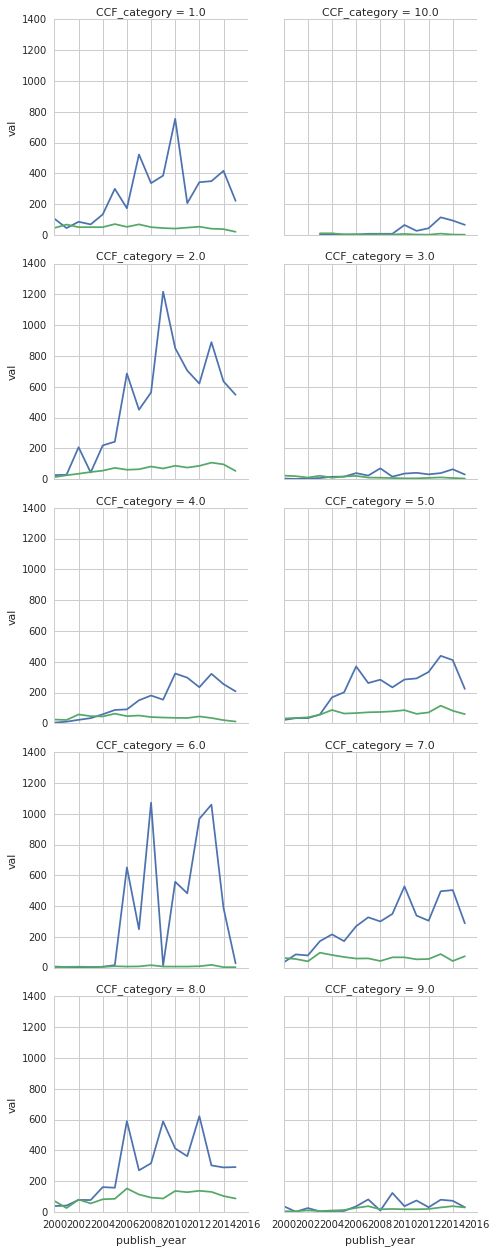

In [581]:
g = sns.FacetGrid(df_tmp, col="CCF_category",col_wrap=2, size=3.5, hue="country")
g = g.map_dataframe(plt.plot, "publish_year", "val")
plt.legend=True

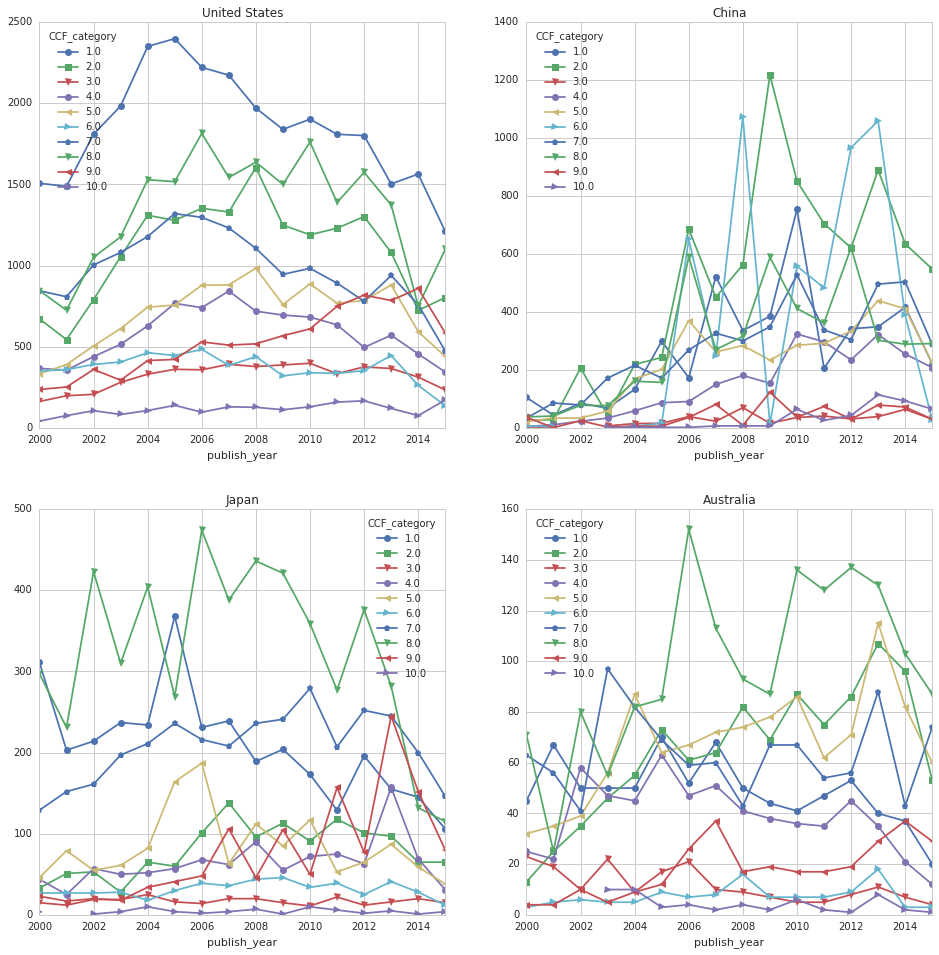

In [532]:
fig, axes = plt.subplots(2,2)
fig.set_size_inches(16, 16)
grouped.ix["United States"].T[['1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0','9.0','10.0']].plot(style=['-o', '-s', '-v', '-o', '-<', '->', '-p', '-v','-<','->', '-o'], ax=axes[0,0], title = "United States")
grouped.ix["China"].T[['1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0','9.0','10.0']].plot(style=['-o', '-s', '-v', '-o', '-<', '->', '-p', '-v','-<','->', '-o'], ax=axes[0,1], title = "China")
grouped.ix["Japan"].T[['1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0','9.0','10.0']].plot(style=['-o', '-s', '-v', '-o', '-<', '->', '-p', '-v','-<','->', '-o'], ax=axes[1,0], title = "Japan")
grouped.ix["Australia"].T[['1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0','9.0','10.0']].plot(style=['-o', '-s', '-v', '-o', '-<', '->', '-p', '-v','-<','->', '-o'], ax=axes[1,1], title = "Australia")

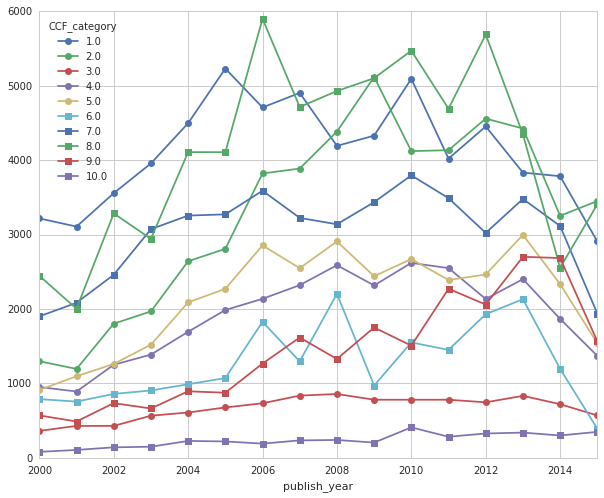

In [600]:
df_paper3.groupby(['publish_year','CCF_category']).size().unstack().ix[range(2000,2016)][['1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0','9.0','10.0']].plot(style=['-o', '-o', '-o', '-o', '-o', '-s', '-s', '-s','-s','-s', '-o'],figsize=(10,8))